### This is a model made to recommend github users - pending

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load the data
df = pd.read_csv('Data/userRepos.csv')
df.head()

,id,name,owner_user,owner_type,description,url,is_fork,date_created,date_updated,date_pushed,...,has _discussions,num_forks,is_archived,is_disabled,is_template,license,allows_forking,open_issues_count,open_issues,topics
0,77457275,codebase,miguelgfierro,User,Code base for programming projects,https://api.github.com/repos/miguelgfierro/cod...,False,2016-12-27T13:23:55Z,2023-09-29T16:02:54Z,2023-12-30T08:52:32Z,...,False,16,False,False,False,Other,True,0,0,"['codebase', 'programming-tools']"
1,48180099,hoap3_arm_kinematics,miguelgfierro,User,Forward and inverse kinematics for the humanoi...,https://api.github.com/repos/miguelgfierro/hoa...,False,2015-12-17T14:50:23Z,2020-04-10T13:27:56Z,2015-12-19T18:20:16Z,...,False,0,False,False,False,No license,True,0,0,[]
2,48292111,hoap3_camera_stabilization,miguelgfierro,User,No description,https://api.github.com/repos/miguelgfierro/hoa...,False,2015-12-19T18:06:11Z,2018-07-18T15:25:11Z,2015-12-24T10:32:21Z,...,False,0,False,False,False,No license,True,0,0,[]
3,48294623,hoap3_dynamics,miguelgfierro,User,Forward and inverse dynamics for the humanoid ...,https://api.github.com/repos/miguelgfierro/hoa...,False,2015-12-19T19:33:05Z,2021-01-21T23:50:30Z,2015-12-24T09:55:54Z,...,False,2,False,False,False,No license,True,1,1,[]
4,48227529,hoap3_movement_simulation,miguelgfierro,User,HOAP-3 humanoid robot movement simulation in O...,https://api.github.com/repos/miguelgfierro/hoa...,False,2015-12-18T09:51:23Z,2018-09-23T11:30:02Z,2015-12-19T19:27:42Z,...,False,3,False,False,False,No license,True,0,0,[]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 24 non-null     int64 
 1   name               24 non-null     object
 2   owner_user         24 non-null     object
 3   owner_type         24 non-null     object
 4   description        24 non-null     object
 5   url                24 non-null     object
 6   is_fork            24 non-null     bool  
 7   date_created       24 non-null     object
 8   date_updated       24 non-null     object
 9   date_pushed        24 non-null     object
 10  size               24 non-null     int64 
 11  stars              24 non-null     int64 
 12  watchers           24 non-null     int64 
 13  updated_at         24 non-null     object
 14  language           19 non-null     object
 15  has_issues         24 non-null     bool  
 16  has_projects       24 non-null     bool  
 17 

In [4]:
# Drop the columns that are not needed
df = df.drop(['owner_type', 'size', 'watchers', 'has_wiki', 'has_pages', 'is_template', 'is_archived', 'is_disabled', 'allows_forking', 'license', 'date_created', 'has_downloads', 'has_projects', 'date_updated', 'date_pushed', 'is_fork', 'has _discussions', 'open_issues_count', 'updated_at'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           24 non-null     int64 
 1   name         24 non-null     object
 2   owner_user   24 non-null     object
 3   description  24 non-null     object
 4   url          24 non-null     object
 5   stars        24 non-null     int64 
 6   language     19 non-null     object
 7   has_issues   24 non-null     bool  
 8   num_forks    24 non-null     int64 
 9   open_issues  24 non-null     int64 
 10  topics       24 non-null     object
dtypes: bool(1), int64(4), object(6)
memory usage: 2.0+ KB


In [5]:
df

,id,name,owner_user,description,url,stars,language,has_issues,num_forks,open_issues,topics
0,77457275,codebase,miguelgfierro,Code base for programming projects,https://api.github.com/repos/miguelgfierro/cod...,53,TeX,True,16,0,"['codebase', 'programming-tools']"
1,48180099,hoap3_arm_kinematics,miguelgfierro,Forward and inverse kinematics for the humanoi...,https://api.github.com/repos/miguelgfierro/hoa...,3,C,True,0,0,[]
2,48292111,hoap3_camera_stabilization,miguelgfierro,No description,https://api.github.com/repos/miguelgfierro/hoa...,1,C++,True,0,0,[]
3,48294623,hoap3_dynamics,miguelgfierro,Forward and inverse dynamics for the humanoid ...,https://api.github.com/repos/miguelgfierro/hoa...,1,C++,True,2,1,[]
4,48227529,hoap3_movement_simulation,miguelgfierro,HOAP-3 humanoid robot movement simulation in O...,https://api.github.com/repos/miguelgfierro/hoa...,1,C++,True,3,0,[]
5,48243382,hoap3_read_sensors,miguelgfierro,This is the code to read the sensors of the hu...,https://api.github.com/repos/miguelgfierro/hoa...,0,C++,True,0,0,[]
6,48181201,hoap3_trajectories,miguelgfierro,A set of movement trajectories developed for t...,https://api.github.com/repos/miguelgfierro/hoa...,0,NaN,True,0,0,[]
7,48245601,hoap3_vision,miguelgfierro,No description,https://api.github.com/repos/miguelgfierro/hoa...,0,C,True,0,0,[]
8,48331754,hoap3_whole_body_kinematics,miguelgfierro,Generation of whole body movements for the hum...,https://api.github.com/repos/miguelgfierro/hoa...,1,Matlab,True,0,0,[]
9,91817037,LightGBM,miguelgfierro,"A fast, distributed, high performance gradient...",https://api.github.com/repos/miguelgfierro/Lig...,1,C++,False,0,0,[]


/var/folders/cv/7plhz1gs47ggc8534599rnhc0000gn/T/ipykernel_35378/145739308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


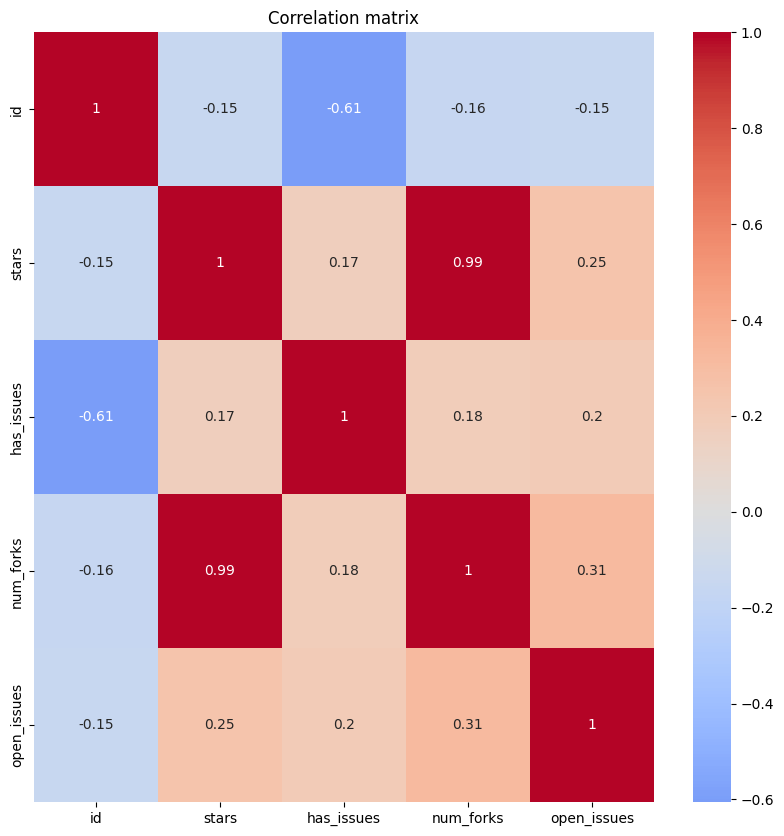

In [6]:
# make a correlation matrix with matplot to see if there are any correlations between the variables
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()